<a href="https://colab.research.google.com/github/koksal100/Deep-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv', encoding='ISO-8859-1')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
pd.get_dummies(df["diagnosis"])

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [ ]:
df.drop("id",axis=1,inplace=True)

In [ ]:
df=pd.concat([df,pd.get_dummies(df["diagnosis"],drop_first=True)],axis=1)

In [ ]:
df.drop("diagnosis",axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [ ]:
X=df.drop("M",axis=1)
y=df["M"]

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: M, Length: 569, dtype: uint8

In [ ]:
df.corr()["M"].abs().sort_values(ascending=False)

M                          1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_train.iloc[0].shape

((381, 30), (381,), (30,))

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
]
)

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy")

history=model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 14.3161 - accuracy: 0.5223
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 3.0557 - accuracy: 0.6719
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.8181 - accuracy: 0.7822
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0462 - accuracy: 0.8478
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.8740
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3780 - accuracy: 0.8950
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4137 - accuracy: 0.8950
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3319 - accuracy: 0.8898
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8819
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2957 - accuracy: 0.9055
Epoch 11

In [ ]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8617


[0.3188221752643585, 0.8617021441459656]

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

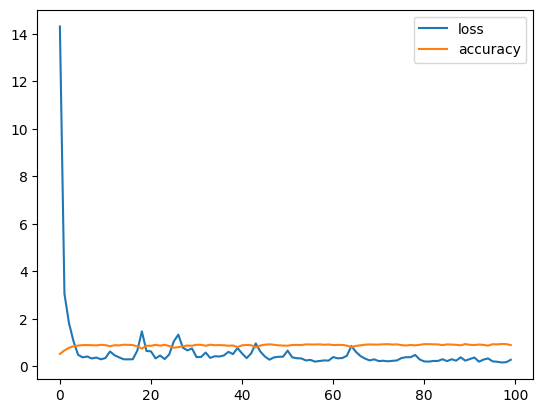

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])  # Use a list for metrics even if there's only one metric

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing the lr_scheduler callback)
history = model_1.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 31.6364 - accuracy: 0.6194 - lr: 1.0000e-04
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 29.4655 - accuracy: 0.6194 - lr: 1.1220e-04
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 27.2410 - accuracy: 0.6194 - lr: 1.2589e-04
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 24.6287 - accuracy: 0.6194 - lr: 1.4125e-04
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 22.1034 - accuracy: 0.6194 - lr: 1.5849e-04
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 19.3485 - accuracy: 0.6194 - lr: 1.7783e-04
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 16.7570 - accuracy: 0.6194 - lr: 1.9953e-04
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 14.0302 - accuracy: 0.6194 - lr: 2.2387e-04
Epoch 9/100
12/12 [==============================] - 0s 2ms/step

<Axes: >

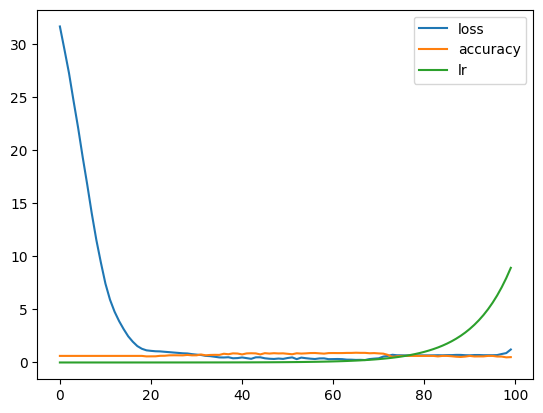

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
pd.DataFrame(history.history)["loss"].argmin()

67

In [ ]:
pd.DataFrame(history.history).iloc[60]

loss        0.319082
accuracy    0.889764
lr          0.100000
Name: 60, dtype: float64

In [ ]:
0.0891/10

0.00891

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
]
)

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.00891),
              metrics="accuracy")

history=model.fit(X_train,y_train,epochs=50,verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 4ms/step - loss: 2.8676 - accuracy: 0.4173
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5512
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.5039
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5981 - accuracy: 0.7008
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.6982
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7848
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5430 - accuracy: 0.8031
Epoch 8/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5348 - accuracy: 0.8530
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.8320
Epoch 10/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.8451
Epoch 11/50
12/12 [

<Axes: >

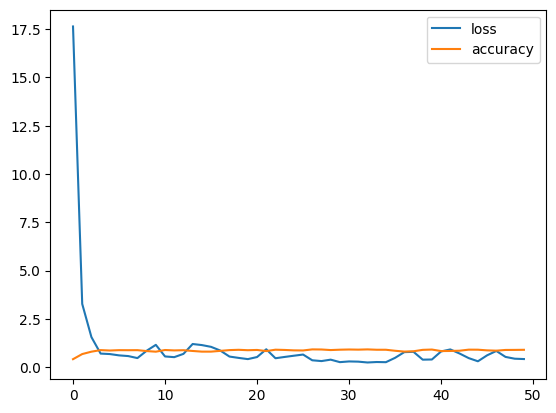

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
#Let's normalize the data then compare the results

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train_norm=scaler.fit_transform(X_train)

In [ ]:
x_test_norm=scaler.transform(X_test)

In [ ]:
x_train_norm

array([[ 0.35581987, -1.72664707,  0.41303118, ...,  1.05652305,
         0.51844283,  0.98925483],
       [-0.37326674,  0.50881308, -0.39469992, ..., -0.89667412,
        -0.63236707, -0.11469617],
       [ 1.4033581 , -0.15144941,  1.34799923, ...,  1.46353548,
         1.02587412, -0.03369823],
       ...,
       [ 0.02898794, -0.56411347, -0.0829084 , ..., -1.2463348 ,
        -0.67979055, -1.26509354],
       [-0.05760855,  0.09614902, -0.04957475, ...,  1.05652305,
         0.45995387,  1.24414347],
       [-0.5604269 ,  0.30837625, -0.61462066, ..., -0.6145405 ,
        -0.30672581, -0.8357478 ]])

In [ ]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
]
)

model2.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy")

history=model2.fit(x_train_norm,y_train,epochs=100,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 8ms/step - loss: 0.2852 - accuracy: 0.9239
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0864 - accuracy: 0.9659
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0576 - accuracy: 0.9843
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0542 - accuracy: 0.9816
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9895
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0272 - accuracy: 0.9921
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0180 - accuracy: 0.9948
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0142 - accuracy: 0.9921
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 11/

In [ ]:
model2.evaluate(x_test_norm,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.1480 - accuracy: 0.9681


[0.1479509174823761, 0.9680851101875305]

In [ ]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.3558 - accuracy: 0.9468


[0.3557645380496979, 0.9468085169792175]

In [ ]:
# %2 improvement in the accucary was earned with the normalization of the x data.